In [29]:
import tensorflow as tf
from tensorflow import keras

# helper 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# 손글씨 숫자 이미지로 이루어진 MNIST 데이터 셋을 대신하여
# 보다 더 다양한 예제를 풀기 위해 패션 MNIST 데이터 셋을 사용함
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [21]:
# load() 함수를 사용하여 튜플형식으로 호출한 MNIST 데이터는 대부분 넘파이 배열인듯
type(train_images)

numpy.ndarray

In [4]:
type(test_labels)

numpy.ndarray

In [20]:
# 패션 데이터셋의 레이블(옷의 클래스를 나타냄)은 0~9까지의 정수 배열임
# 추후에 보기 쉽게 하기 위해 레이블에 이름을 달아줌(배열을 생성하여 인덱스로 이름을 찾을 수 있도록 함)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
# 60,000개의 이미지 데이터 존재
# 각 이미지는 28x28 픽셀로 구현되어 있음
train_images.shape

(60000, 28, 28)

In [ ]:
# 마찬가지로 60,000개의 정답 레이블 존재
len(train_labels)

60000

In [ ]:
# 레이블의 데이터 타입 확인 가능
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
# 테스트 이미지 데이터는 10,000개가 존재
test_images.shape

(10000, 28, 28)

In [ ]:
# 이하 내용은 같습니다,,
len(test_labels)

10000

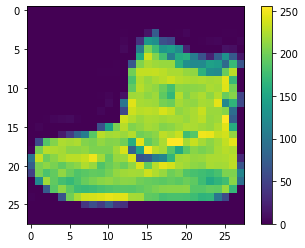

In [22]:
plt.figure() # figure 창 가로 세로 크기 조절 가능
plt.imshow(train_images[0]) # 첫번째 이미지 데이터
plt.colorbar() # 우측 칼라 바
plt.grid(False) # 격자 표시 (아마 False가 default 값인듯)
plt.show()

In [23]:
# 이미지 픽셀 값의 범위가 0~255 사이이기 때문에 값의 범위를 0~1 사이로 정규화 해줌
# 이처럼 입력 데이터에 특정 변환을 가하는 것을 전처리 과정이라고 부름
train_images = train_images / 255.0
test_images = test_images / 255.0

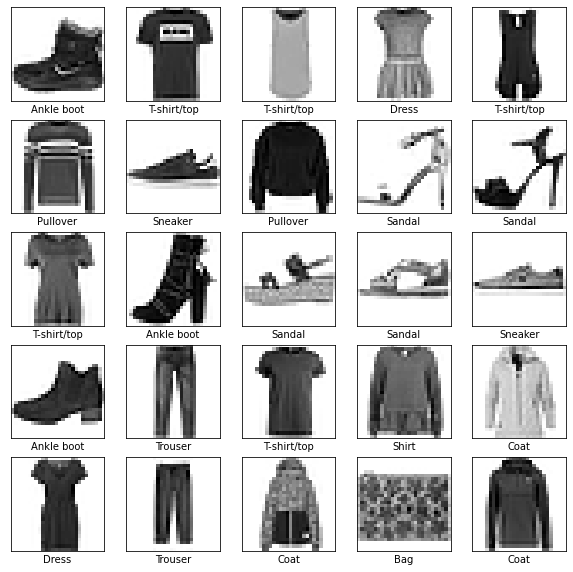

In [60]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([]) # 해당 축의 눈금을 없애 줌
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

데이터 포맷이 올바른지 확인했으니 이제 훈련할 준비 완료!

**모델 구성**

In [46]:
# 층 설정(layer)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
# 1. # 28 x 28 픽셀의 이미지 형식을 1차원으로 평탄화
# 2, 3. 두 개의 완전 연결(밀집 연결) -> fully-connected(densly-connected) 층
# 2, 3. 첫 번째 층은 렐루 함수를 활성화 함수로 하며 128개의 뉴런으로 이루어짐
# 2, 3. 두 번째 층은 소프트맥스 함수를 활성화 함수로 하며 10개의 뉴런(클래스의 개수)으로 이루어짐
# 마지막 층의 10개의 뉴런에서 반환된 값의 합은 1 (반환된 값은 확률을 나타냄)
# Dense 레이어는 가중치를 포함하는 레이어인듯

In [47]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# optimizer = Optimizer -> ex) gradient descent
# loss = Loss function -> ex) cross entropy error
# metrics = Metrics; Used to monitoring training and test steps -> ex) accuracy

**모델 훈련**

In [48]:
model.fit(train_images, train_labels, epochs=5)
# 훈련 이미지, 훈련 레이블, 에폭 수를 인수로 fit() 메서드를 호출하여 모델이 훈련 데이터를 학습하게 함


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 10.0482 - accuracy: 0.6865
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6492 - accuracy: 0.7737
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5927 - accuracy: 0.7925
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5503 - accuracy: 0.8073
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5354 - accuracy: 0.8127


**정확도 평가**

In [49]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\n테스트 정확도:', test_acc)
# 테스트 이미지, 테스트 레이블을 인수로 evaluate() 메서드를 호출하여 모델의 성능을 비교

313/313 - 0s - loss: 0.5876 - accuracy: 0.8016

테스트 정확도: 0.8015999794006348


테스트 정확도가 훈련 이미지 데이터 보다 살짝 낮은 것을 확인할 수 있는데 이는 overfitting 때문

**예측 만들기**

In [51]:
predictions = model.predict(test_images)

In [54]:
predictions[0]
# 10개의 옷 품목에 상응하는 모델의 확률(신뢰도)를 예측함

array([2.0428620e-12, 1.9035506e-08, 1.4037930e-24, 2.0830435e-11,
       1.5271296e-19, 3.5867593e-03, 1.6161997e-24, 1.1704274e-02,
       4.2207531e-09, 9.8470902e-01], dtype=float32)

In [56]:
np.argmax(predictions[0])
# 9번 인덱스가 가장 높음(앵클 부츠)

9

In [58]:
class_names[np.argmax(predictions[0])]
# 9를 인덱스로하여 class_names 배열의 10번째 요소인 'Ankle boot'를 추출

'Ankle boot'

In [69]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

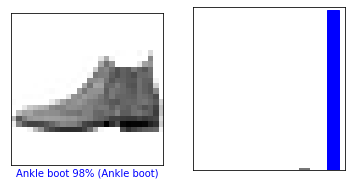

In [70]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

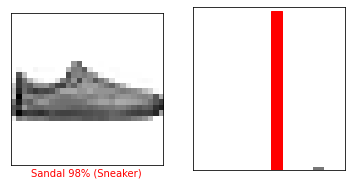

In [71]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

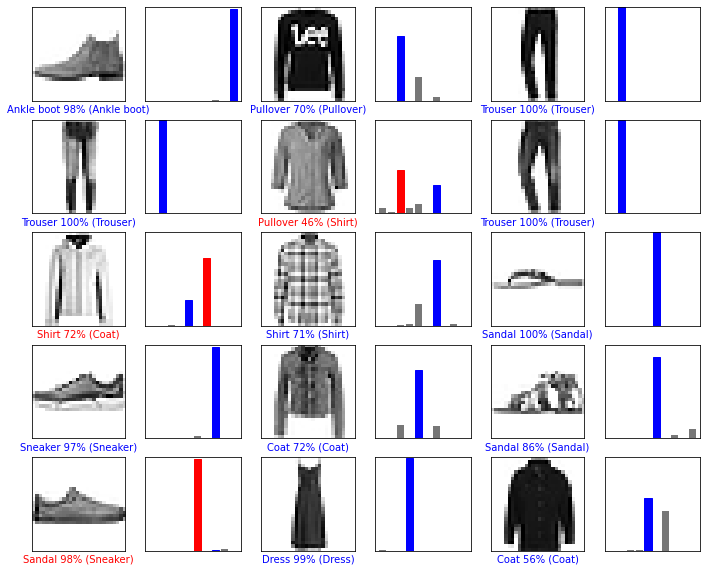

In [72]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

정확히 80%의 정답률을 가지는듯..

In [100]:
# 테스트 세트에서 이미지 하나를 선택
img = test_images[0]

print(img.shape)

(28, 28)


In [101]:
# 이미지 하나만 사용할 때도 배치에 추가
# 이유 -> tf.keras는 배치(batch)로 예측을 만드는데 최적화 되어 있기 때문에
# 하나만 예측할 때에도 차원을 늘려줘야 함
img = np.reshape(img,(1,28,28))
img = (np.expand_dims(img,0))
# 위에 두개 다 차원을 늘리는 용도로 사용 가능한듯 코딩할 땐 하나만 사용!
print(img.shape)

(1, 28, 28)


In [93]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.0428620e-12 1.9035506e-08 1.4037930e-24 2.0830435e-11 1.5271296e-19
  3.5867593e-03 1.6161997e-24 1.1704274e-02 4.2207526e-09 9.8470902e-01]]


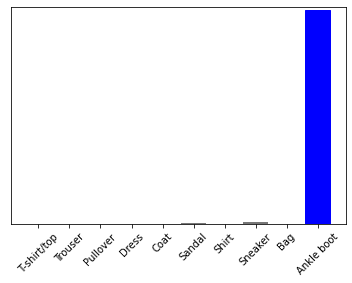

In [81]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [82]:
np.argmax(predictions_single[0])

9

In [94]:
np.__version__

'1.19.5'